In [1]:
library(reticulate)
library(plotly)
library(pdp)
library(ggpubr)
library(psych)
library(caret)
library(devtools)

set.seed(2020)

use_python("C:/Python37")
wl <- import("welly",convert = FALSE)
np <- import("numpy",convert = FALSE)

Loading required package: ggplot2


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Loading required package: lattice

Loading required package: usethis



In [2]:
#Loading .las data
#Well 1 and 2
w1.las =  wl$Well$from_las('159-19A_LFP.las')
w2.las =  wl$Well$from_las('159-19BT2_LFP.las')

In [3]:
#convert to pandas dataframe
w1.pyDF = wl$Well$df(w1.las)
w2.pyDF = wl$Well$df(w2.las)
#Converto to R object
w1.rDF <- py_to_r(w1.pyDF)
w2.rDF <- py_to_r(w2.pyDF)
#Add MD as column
W1.log <- w1.rDF %>%
          select(LFP_GR,LFP_DT,LFP_NPHI,LFP_RHOB,LFP_RT) %>%
            mutate(MD = as.numeric(rownames(w1.rDF))) %>%
            filter(MD >= 3821.50, MD <=3920.15)

W2.log <- w2.rDF %>%
          select(LFP_GR,LFP_DT,LFP_NPHI,LFP_RHOB,LFP_RT) %>%
            mutate(MD = as.numeric(rownames(w2.rDF))) %>%
            filter(MD >= 4035.73, MD <=4178.60)

colnames(W1.log) <- c("GR","DT","NPHI","RHOB","RT","MD")
colnames(W2.log) <- c("GR","DT","NPHI","RHOB","RT","MD")
head(W1.log)
head(W2.log)


,GR,DT,NPHI,RHOB,RT,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28.32400,78.34450,0.1998000,2.334100,3.89300,3821.582
2,26.69434,77.23495,0.2323396,2.342096,5.47851,3821.735
3,24.16866,76.24235,0.1402604,2.488304,7.77949,3821.887
4,25.46415,75.48130,0.1555899,2.487001,10.14845,3822.039
5,23.37800,74.93880,0.1564000,2.495000,11.22800,3822.192
6,25.04657,74.55793,0.1567948,2.509909,11.01159,3822.344


,GR,DT,NPHI,RHOB,RT,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26.19820,72.82270,0.1087000,2.543300,0.6519000,4035.857
2,22.42190,70.74790,0.1194000,2.428300,1.6444000,4036.009
3,24.04682,70.11829,0.1097941,2.428005,1.6114999,4036.162
4,25.76038,71.32931,0.1008059,2.435995,0.6970001,4036.314
5,23.52137,73.19607,0.1411735,2.394127,0.6152533,4036.466
6,18.16810,76.02830,0.1747000,2.297300,0.4704000,4036.619


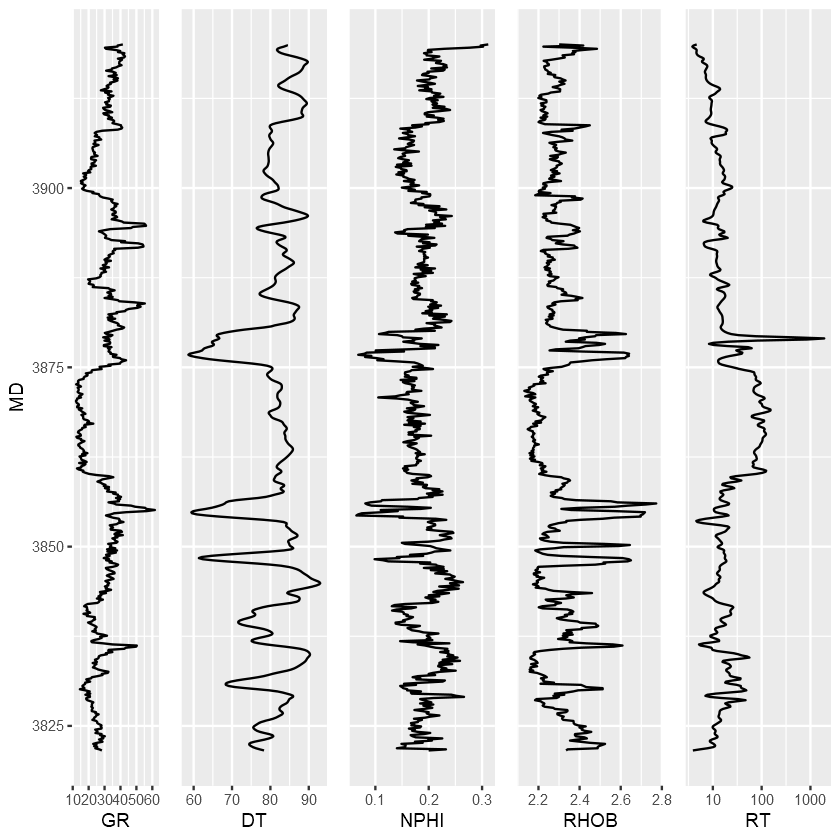

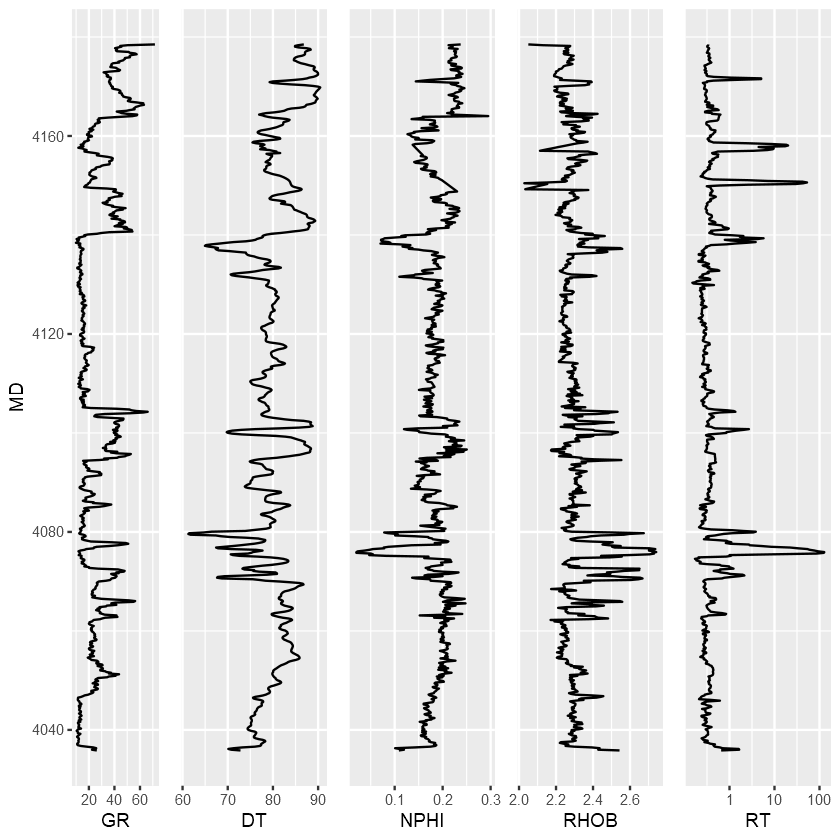

In [4]:
#Plot log data
#Well 1
p1 <- ggplot(W1.log, aes(MD,GR))+ geom_line() + coord_flip() + ylab("GR")
p2 <- ggplot(W1.log, aes(MD,DT))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("DT") 
p3 <- ggplot(W1.log, aes(MD,NPHI))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("NPHI")
p4 <- ggplot(W1.log, aes(MD,RHOB))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RHOB")
p5 <- ggplot(W1.log, aes(MD,RT))+ geom_line() + coord_flip() + scale_y_log10() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RT")

ggarrange(p1,p2,p3,p4,p5,nrow = 1,widths = c(3,3,3,3,3),heights = 3)

#well 2
p1 <- ggplot(W2.log, aes(MD,GR))+ geom_line() + coord_flip() + ylab("GR")
p2 <- ggplot(W2.log, aes(MD,DT))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("DT") 
p3 <- ggplot(W2.log, aes(MD,NPHI))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("NPHI")
p4 <- ggplot(W2.log, aes(MD,RHOB))+ geom_line() + coord_flip() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RHOB")
p5 <- ggplot(W2.log, aes(MD,RT))+ geom_line() + coord_flip() + scale_y_log10() + theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) + ylab("RT")

ggarrange(p1,p2,p3,p4,p5,nrow = 1)

Warning message:
"Removed 76 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


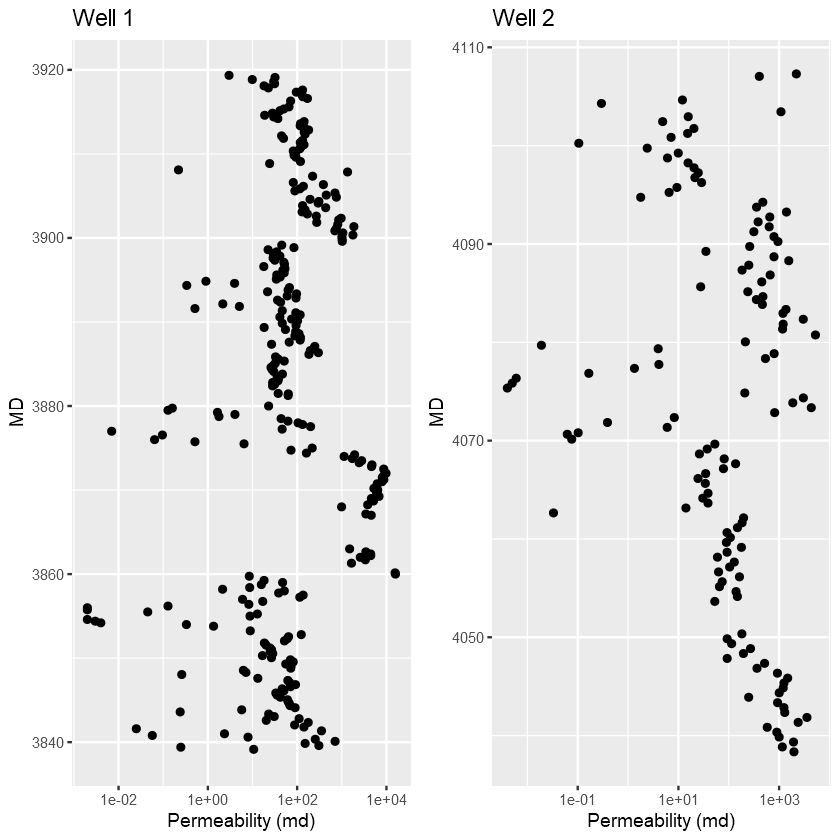

In [5]:
#load core data
W1.core <- read.csv("15_9-19_A_Core.csv")
W2.core <- read.csv("15_9-19_BT2_Core.csv")


#Plot porosity data
p1.core <- ggplot(W1.core, aes(MD,PERMEABILITY))+ geom_point() + coord_flip() + ylab("Permeability (md)") + ggtitle("Well 1") + scale_y_log10()
p2.core <- ggplot(W2.core, aes(MD,PERMEABILITY))+ geom_point() + coord_flip() + ylab("Permeability (md)") + ggtitle("Well 2") + scale_y_log10()

ggarrange(p1.core,p2.core,nrow = 1)

In [6]:
#Log data in core data frame using interpolation
W1.core$GR <- approx(x=W1.log$MD, y=W1.log$GR, xout=W1.core$MD)$y
W1.core$DT <- approx(x=W1.log$MD, y=W1.log$DT, xout=W1.core$MD)$y
W1.core$NPHI <- approx(x=W1.log$MD, y=W1.log$NPHI, xout=W1.core$MD)$y
W1.core$RHOB <- approx(x=W1.log$MD, y=W1.log$RHOB, xout=W1.core$MD)$y
W1.core$RT <- approx(x=W1.log$MD, y=W1.log$RT, xout=W1.core$MD)$y

W2.core$GR <- approx(x=W2.log$MD, y=W2.log$GR, xout=W2.core$MD)$y
W2.core$DT <- approx(x=W2.log$MD, y=W2.log$DT, xout=W2.core$MD)$y
W2.core$NPHI <- approx(x=W2.log$MD, y=W2.log$NPHI, xout=W2.core$MD)$y
W2.core$RHOB <- approx(x=W2.log$MD, y=W2.log$RHOB, xout=W2.core$MD)$y
W2.core$RT <- approx(x=W2.log$MD, y=W2.log$RT, xout=W2.core$MD)$y

head(W1.core)
head(W2.core)

,MD,POROSITY,PERMEABILITY,GR,DT,NPHI,RHOB,RT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3838.85,0.142,NA,24.71075,74.94938,0.1775530,2.484541,14.36259
2,3839.15,0.104,10.632,22.06828,72.45723,0.1452691,2.479459,18.45225
3,3839.40,0.124,0.248,19.72139,71.62805,0.1377433,2.408856,16.41255
4,3839.48,0.180,NA,20.65357,71.62304,0.1453788,2.397327,15.76819
5,3839.60,0.157,306.810,22.16444,71.75638,0.1544042,2.379677,14.96170
6,3839.85,0.159,150.954,23.94597,72.83602,0.1585486,2.309910,14.33245


,MD,POROSITY,PERMEABILITY,GR,DT,NPHI,RHOB,RT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4038.35,0.201,1973.924,11.88587,76.09389,0.1640912,2.297826,0.2490316
2,4038.85,0.203,1158.927,11.72253,75.94428,0.1548238,2.293979,0.3084022
3,4039.35,0.207,1935.117,11.46120,76.30264,0.1640788,2.288254,0.3311575
4,4039.85,0.206,1003.681,10.52521,75.04695,0.1575202,2.296767,0.3215750
5,4040.35,0.190,901.498,13.15861,74.42871,0.1587632,2.338597,0.3409879
6,4040.85,0.201,581.095,12.09045,75.10514,0.1595344,2.304129,0.2976087


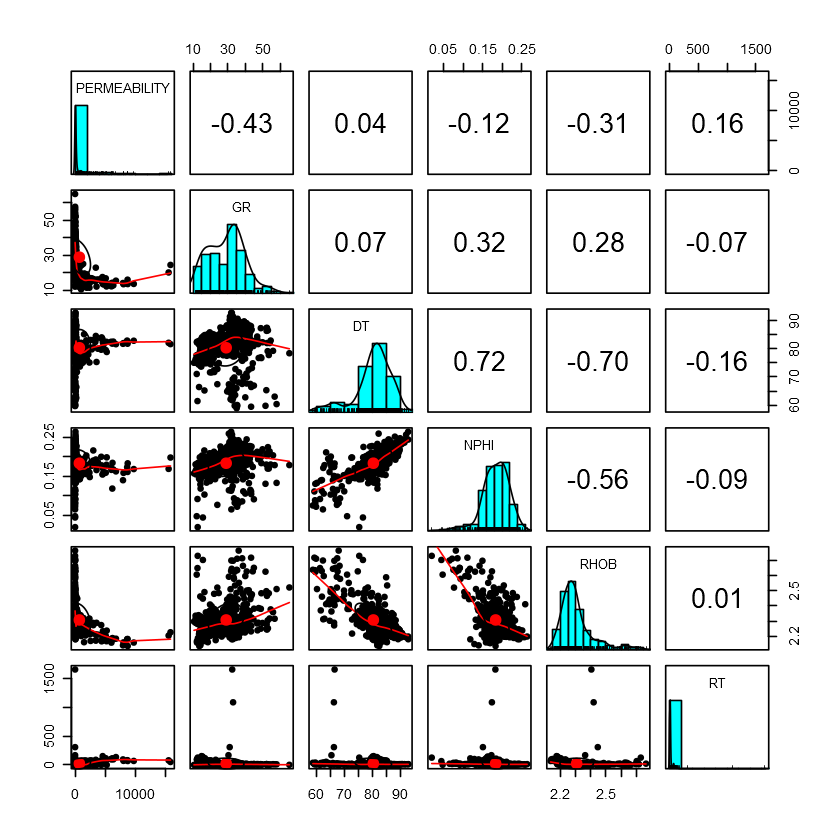

In [7]:
W.core <- rbind(W1.core,W2.core)
pairs.panels(W.core[,-c(1,2)])

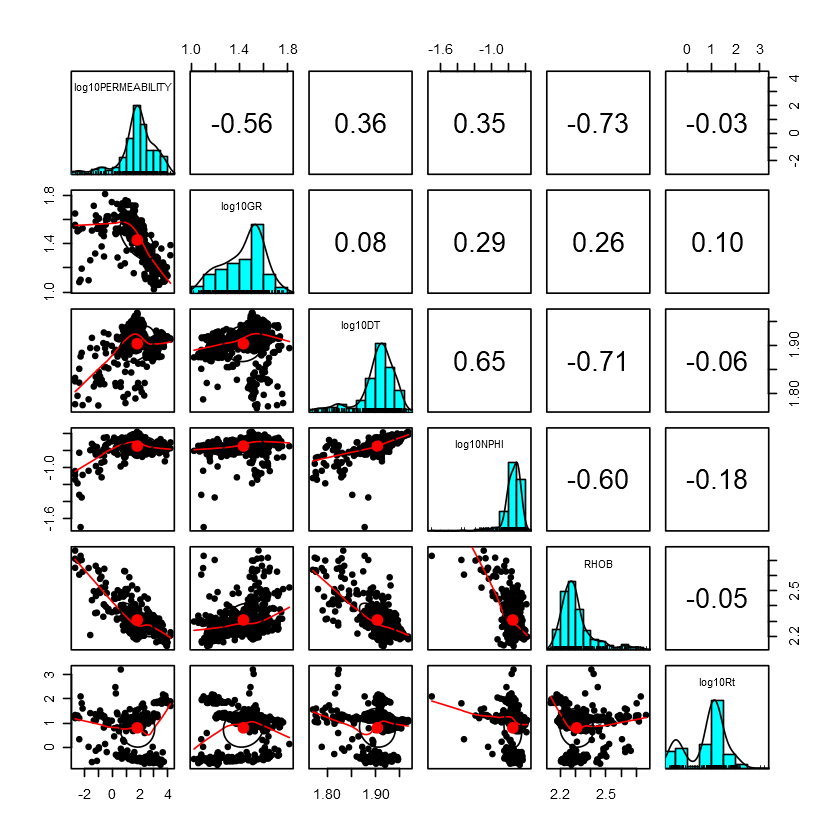

In [8]:
W.coreLog <- data.frame(MD = W.core$MD) 
W.coreLog$log10PERMEABILITY <- log10(W.core$PERMEABILITY)
W.coreLog$log10GR <- log10(W.core$GR)
W.coreLog$log10DT <- log10(W.core$DT)
W.coreLog$log10NPHI <- log10(W.core$NPHI)
W.coreLog$RHOB <- W.core$RHOB
W.coreLog$log10Rt <- log10(W.core$RT)

pairs.panels(W.coreLog[,-c(1)])

In [9]:
#Multiple lineal regression*******************************************************

modelLR <- train(
  log10(PERMEABILITY) ~ log10(GR) + log10(DT) + log10(NPHI) + RHOB + log10(RT), 
  data = W.core[,-c(1,2)],
  method = "lm",
  na.action = na.omit,
  preProc = c("center","scale"),
  trControl = trainControl(
    method = "cv",
    number=10,
    savePred=TRUE,
    verboseIter = TRUE,
  )
)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [10]:
print(modelLR)
summary(modelLR$finalModel)

Linear Regression 

485 samples
  5 predictor

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 367, 367, 364, 366, 366, 367, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6562294  0.7288079  0.4682466

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5256 -0.3036  0.0663  0.3615  1.9247 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.79623    0.03270  54.924  < 2e-16 ***
`log10(GR)`   -0.67585    0.04582 -14.749  < 2e-16 ***
`log10(DT)`   -0.13229    0.05017  -2.637   0.0087 ** 
`log10(NPHI)`  0.36654    0.05685   6.448 3.27e-10 ***
RHOB          -0.63634    0.06227 -10.219  < 2e-16 ***
`log10(RT)`    0.07384    0.03657   2.019   0.0441 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6598 on 401 degrees of freedom
Multiple R-squared:  0.7307,	Adjusted R-squared:  0.7273 
F-statistic: 217.6 on 5 and 401 DF,  p-value: < 2.2e-16


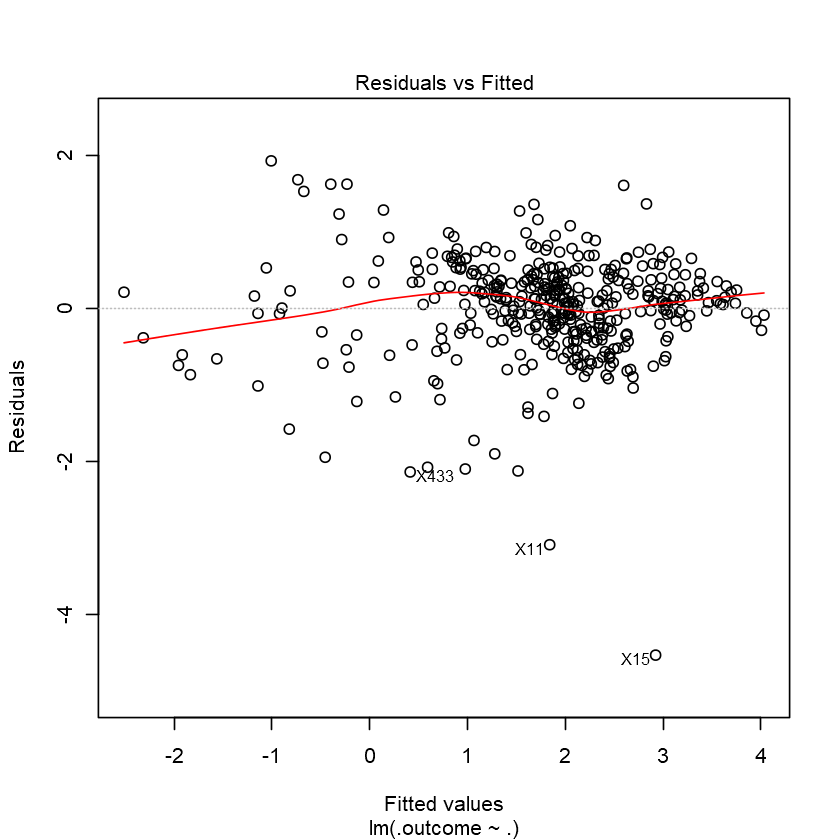

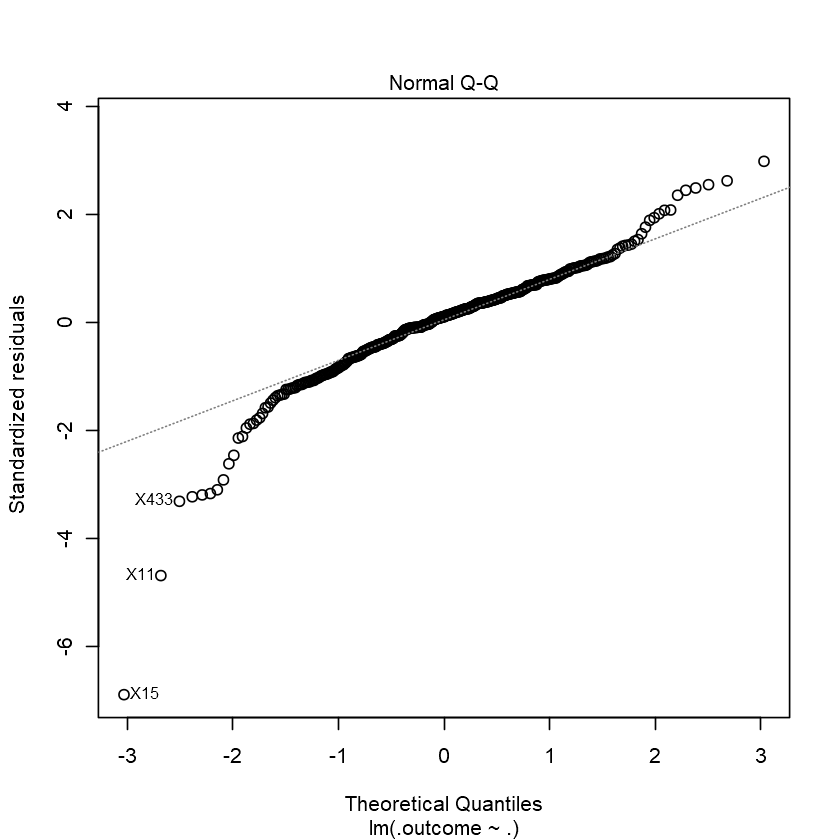

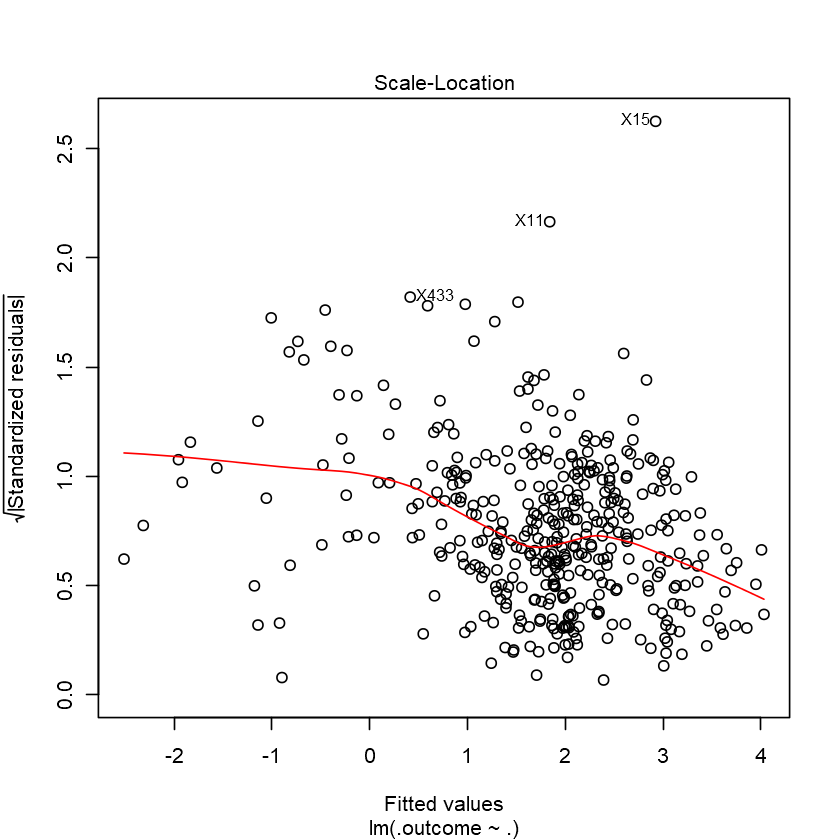

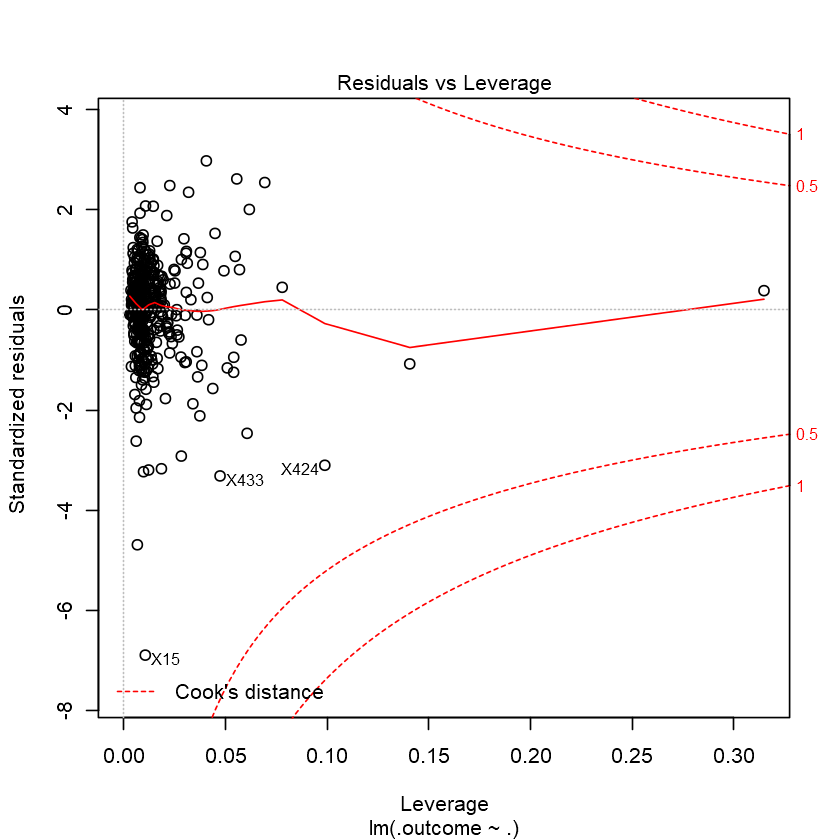

In [11]:
#Analysis of MLR model
plot(modelLR$finalModel)

Warning message:
"Removed 76 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


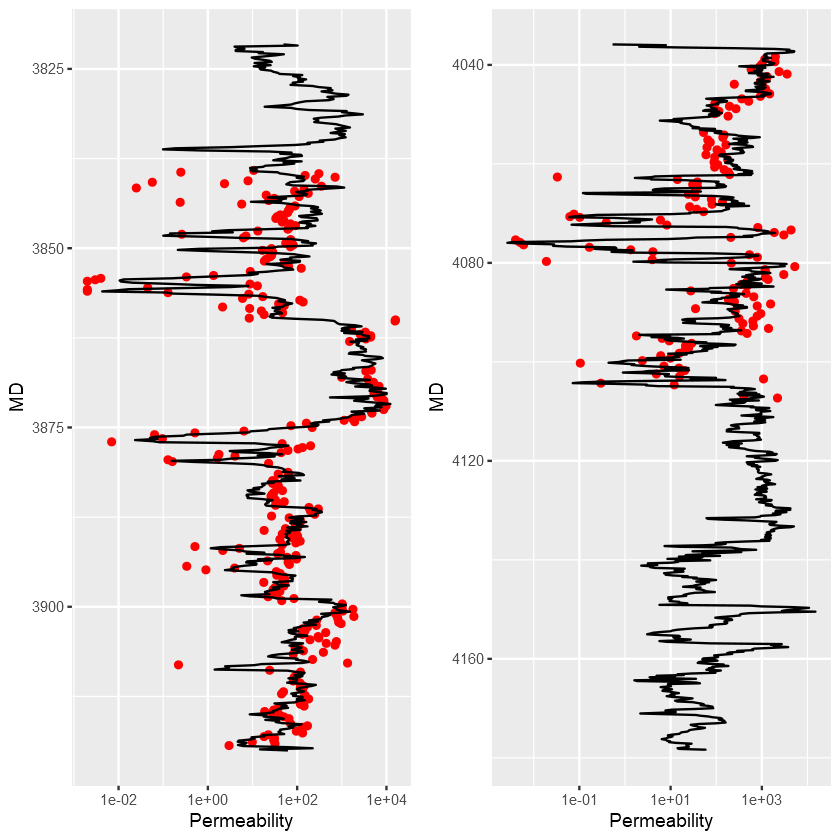

In [12]:
#Plot core data with model prediction
pred.W1.MLR <- 10^predict(modelLR, W1.log[-c(6)])
pW1.pred <- ggplot()+ geom_point(aes(x = W1.core$MD, y = W1.core$PERMEABILITY),color = "red") +
            geom_line(aes(x = W1.log$MD, y = pred.W1.MLR)) + 
            coord_flip() + ylab("Permeability") + xlab("MD") + scale_x_reverse() + scale_y_log10()

pred.W2.MLR <- 10^predict(modelLR, W2.log[-c(6)])
pW2.pred <- ggplot()+ geom_point(aes(x = W2.core$MD, y = W2.core$PERMEABILITY),color = "red") +
            geom_line(aes(x = W2.log$MD, y = pred.W2.MLR)) + 
            coord_flip() + ylab("Permeability") + xlab("MD") + scale_x_reverse() + scale_y_log10()

ggarrange(pW1.pred,pW2.pred,nrow = 1)

In [13]:
#Support vector machine model
model_svm <- train(
  log10(PERMEABILITY) ~ log10(GR) + log10(DT) + log10(NPHI) + RHOB + log10(RT), 
  data = W.core[,-c(1,2)],
  method = "svmRadial",
  na.action = na.omit,
  tuneLength = 10,
  #preProc = c("center","scale"),
  trControl = trainControl(
    method = "cv",  
    number=10,
    savePred=TRUE,
    verboseIter = TRUE
  )
)

+ Fold01: sigma=0.508, C=  0.25 
- Fold01: sigma=0.508, C=  0.25 
+ Fold01: sigma=0.508, C=  0.50 
- Fold01: sigma=0.508, C=  0.50 
+ Fold01: sigma=0.508, C=  1.00 
- Fold01: sigma=0.508, C=  1.00 
+ Fold01: sigma=0.508, C=  2.00 
- Fold01: sigma=0.508, C=  2.00 
+ Fold01: sigma=0.508, C=  4.00 
- Fold01: sigma=0.508, C=  4.00 
+ Fold01: sigma=0.508, C=  8.00 
- Fold01: sigma=0.508, C=  8.00 
+ Fold01: sigma=0.508, C= 16.00 
- Fold01: sigma=0.508, C= 16.00 
+ Fold01: sigma=0.508, C= 32.00 
- Fold01: sigma=0.508, C= 32.00 
+ Fold01: sigma=0.508, C= 64.00 
- Fold01: sigma=0.508, C= 64.00 
+ Fold01: sigma=0.508, C=128.00 
- Fold01: sigma=0.508, C=128.00 
+ Fold02: sigma=0.508, C=  0.25 
- Fold02: sigma=0.508, C=  0.25 
+ Fold02: sigma=0.508, C=  0.50 
- Fold02: sigma=0.508, C=  0.50 
+ Fold02: sigma=0.508, C=  1.00 
- Fold02: sigma=0.508, C=  1.00 
+ Fold02: sigma=0.508, C=  2.00 
- Fold02: sigma=0.508, C=  2.00 
+ Fold02: sigma=0.508, C=  4.00 
- Fold02: sigma=0.508, C=  4.00 
+ Fold02: 

Support Vector Machines with Radial Basis Function Kernel 

485 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 367, 366, 365, 367, 366, 367, ... 
Resampling results across tuning parameters:

  C       RMSE       Rsquared   MAE      
    0.25  0.8055684  0.6421548  0.4631090
    0.50  0.7363348  0.6849024  0.4392652
    1.00  0.6938915  0.7060706  0.4267009
    2.00  0.6666078  0.7193940  0.4267531
    4.00  0.6560721  0.7274233  0.4255534
    8.00  0.6663415  0.7202673  0.4320016
   16.00  0.6928271  0.7022589  0.4527820
   32.00  0.7261172  0.6784506  0.4769798
   64.00  0.7701577  0.6488679  0.5026958
  128.00  0.8319759  0.6075176  0.5397864

Tuning parameter 'sigma' was held constant at a value of 0.5079912
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.5079912 and C = 4.


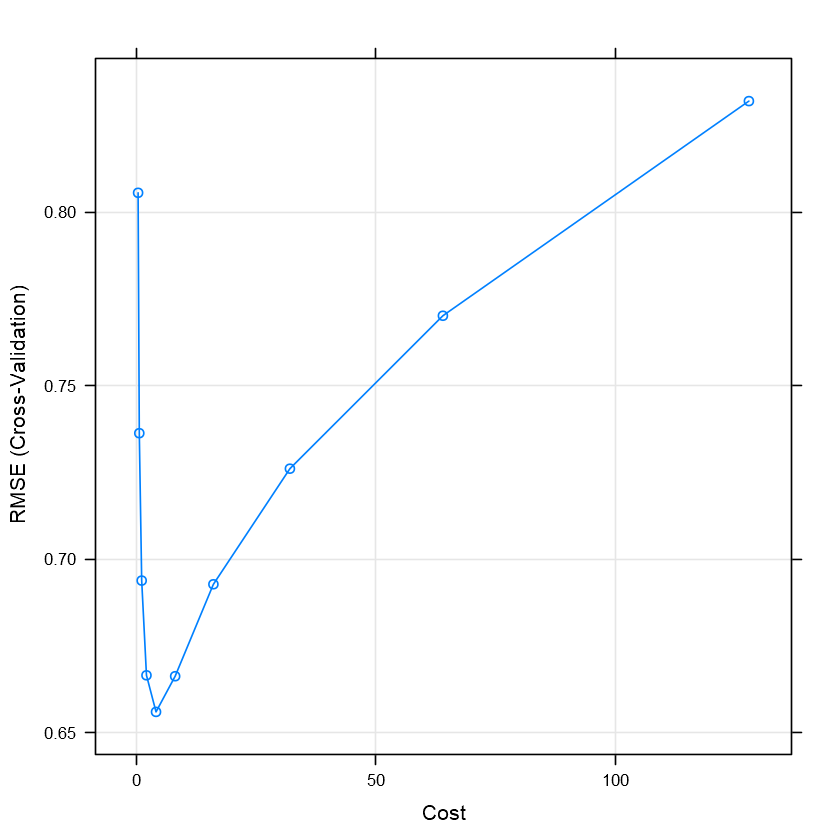

In [14]:
print(model_svm)
plot(model_svm)
#plot(model_svm$finalModel)

Warning message:
"Removed 76 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


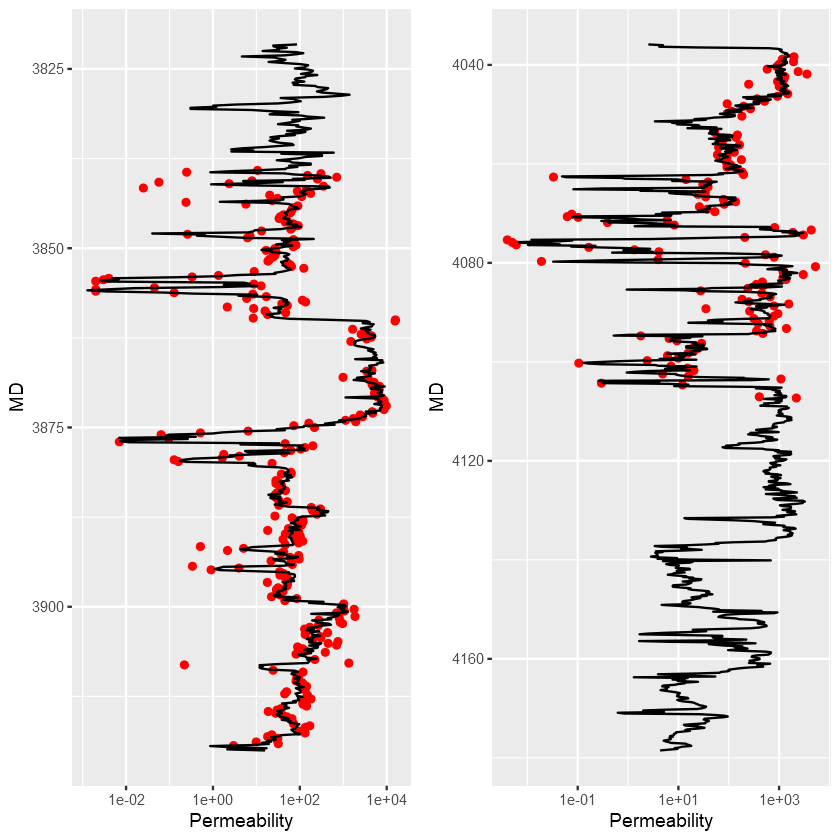

In [15]:
#Plot core data with model prediction
pred.W1.SVM <- 10^predict(model_svm, W1.log[-c(6)])
pW1.pred.SVM <- ggplot()+ geom_point(aes(x = W1.core$MD, y = W1.core$PERMEABILITY),color = "red") +
            geom_line(aes(x = W1.log$MD, y = pred.W1.SVM)) + 
            coord_flip() + ylab("Permeability") + xlab("MD") + scale_x_reverse() + scale_y_log10()

pred.W2.SVM <- 10^predict(model_svm, W2.log[-c(6)])
pW2.pred.SVM <- ggplot()+ geom_point(aes(x = W2.core$MD, y = W2.core$PERMEABILITY),color = "red") +
            geom_line(aes(x = W2.log$MD, y = pred.W2.SVM)) + 
            coord_flip() + ylab("Permeability") + xlab("MD") + scale_x_reverse() + scale_y_log10()

ggarrange(pW1.pred.SVM,pW2.pred.SVM,nrow = 1)

In [16]:
#Neural netowork model
model_nnt <- train(
   log10(PERMEABILITY) ~ log10(GR) + log10(DT) + log10(NPHI) + RHOB + log10(RT), 
  data = W.core[,-c(1,2)],
  method = "nnet",
  na.action = na.omit,
  linout=T,
  #preProc = c("center", "scale"),
  tuneLength =10,
  trace = FALSE,
  trControl = trainControl(
    method = "cv",  #LGOCV, repeatedcv
    number=10,
    savePred=TRUE
    )
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


In [17]:
print(model_nnt)

Neural Network 

485 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 366, 366, 367, 367, 367, 367, ... 
Resampling results across tuning parameters:

  size  decay         RMSE       Rsquared   MAE      
   1    0.0000000000  0.9351931  0.4569110  0.6514362
   1    0.0001000000  0.9255283  0.5869616  0.6533737
   1    0.0002371374  0.8166693  0.6535774  0.5870982
   1    0.0005623413  0.7804176  0.6719196  0.5623103
   1    0.0013335214  0.7966705  0.6040740  0.5613768
   1    0.0031622777  0.7834396  0.6737708  0.5682272
   1    0.0074989421  0.6654298  0.7326718  0.4726139
   1    0.0177827941  0.6668623  0.7316091  0.4749825
   1    0.0421696503  0.6690316  0.7298353  0.4789414
   1    0.1000000000  0.6793916  0.7219675  0.4886514
   3    0.0000000000  0.6601848  0.7423806  0.4574163
   3    0.0001000000  0.6451738  0.7545135  0.4432296
   3    0.0002371374  0.6703873  0.7443910  0.4548275
   3    0.0005623413  0.6343930  0.76

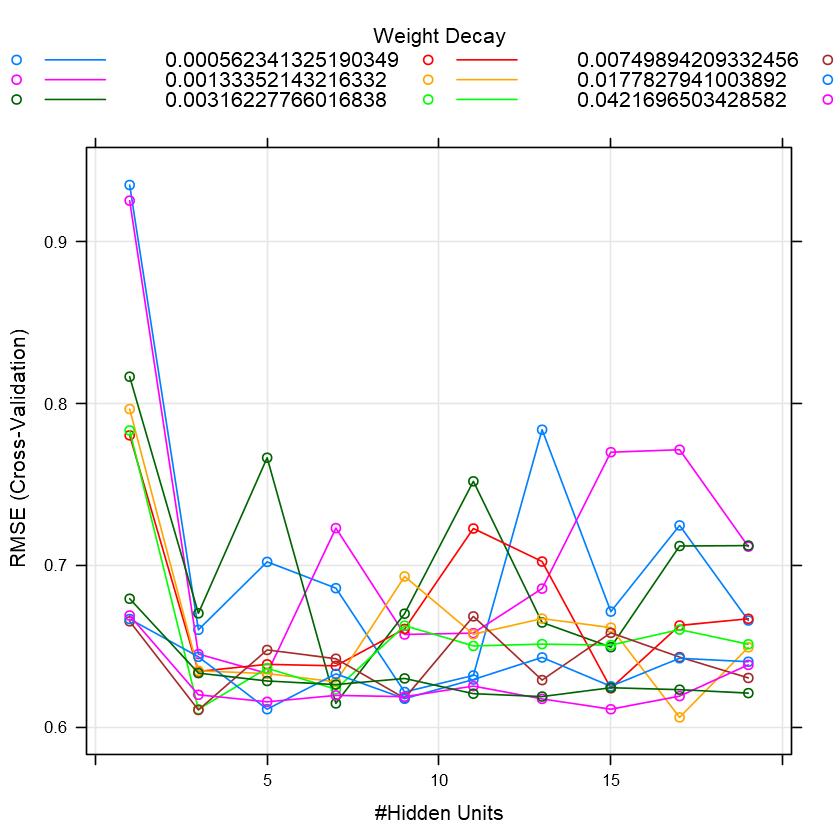

In [18]:
plot(model_nnt)

Warning message:
"Removed 76 rows containing missing values (geom_point)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


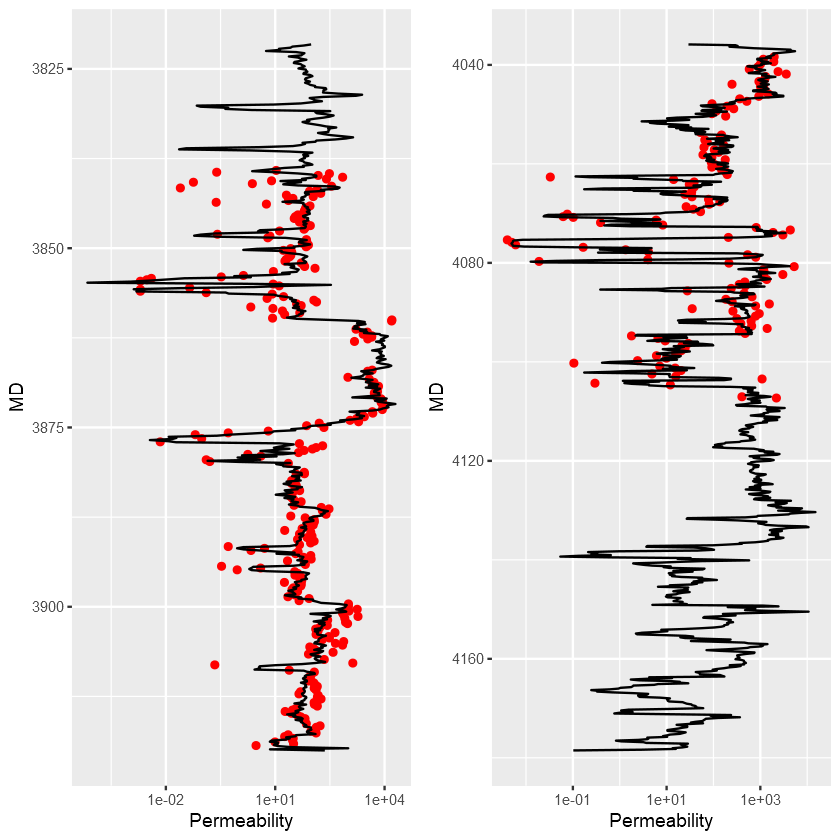

In [19]:
#Plot core data with model prediction
pred.W1.NNT <- 10^predict(model_nnt, W1.log[-c(6)])
pW1.pred.NNT <- ggplot()+ geom_point(aes(x = W1.core$MD, y = W1.core$PERMEABILITY),color = "red") +
            geom_line(aes(x = W1.log$MD, y = pred.W1.NNT)) + 
            coord_flip() + ylab("Permeability") + xlab("MD") + scale_x_reverse() + scale_y_log10()

pred.W2.NNT <- 10^predict(model_nnt, W2.log[-c(6)])
pW2.pred.NNT <- ggplot()+ geom_point(aes(x = W2.core$MD, y = W2.core$PERMEABILITY),color = "red") +
            geom_line(aes(x = W2.log$MD, y = pred.W2.NNT)) + 
            coord_flip() + ylab("Permeability") + xlab("MD") + scale_x_reverse() + scale_y_log10()
 
ggarrange(pW1.pred.NNT,pW2.pred.NNT,nrow = 1)

SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef

Loading required package: scales


Attaching package: 'scales'


The following objects are masked from 'package:psych':

    alpha, rescale


Loading required package: reshape


Attaching package: 'reshape'


The following object is masked from 'package:plotly':

    rename




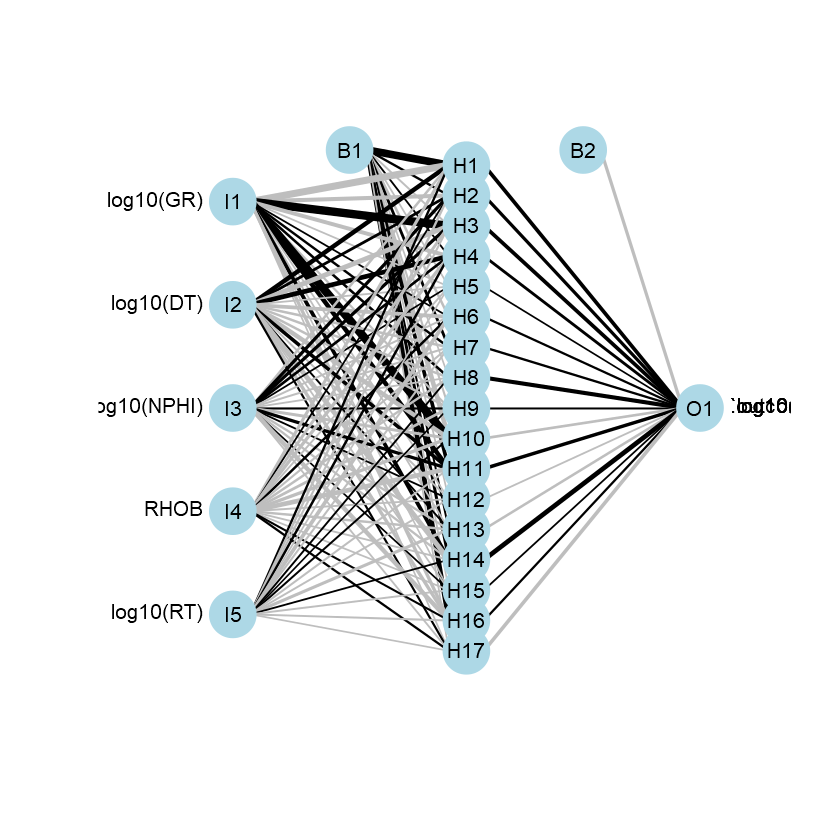

In [20]:
source_url("https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r")

plot(model_nnt$finalModel, max.sp = T)

In [21]:
W1.log$PERMEABILITY <- pred.W1.NNT
W2.log$PERMEABILITY <- pred.W2.NNT

In [23]:
write.csv(W1.log, "W1.log.permeability.csv")
write.csv(W2.log, "W2.log.permeability.csv")